# Handwritten Digits Kaggle

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in Kaggle's `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./digit-recognizer/train.csv')

In [3]:
y_data = df['label'].values

In [4]:
y_data = to_categorical(y_data, 10)

In [7]:
y_data.shape

(42000, 10)

In [8]:
df.drop('label', axis=1, inplace=True)

In [9]:
X_data = (df.values).astype('float32')

In [10]:
X_data.shape

(42000, 784)

In [11]:
X_test = pd.read_csv('./digit-recognizer/test.csv')

In [12]:
X_test = X_test.values.astype('float32')

In [13]:
X_test.shape

(28000, 784)

In [14]:
# Normalizing data 
X_data = X_data/255.0
X_test = X_test/255.0

In [15]:
# train/val split for RNN
X_train_flat, X_val_flat, y_train_flat, y_val_flat= train_test_split(
    X_data, y_data, random_state = 42)

In [16]:
X_train_flat.shape

(31500, 784)

In [59]:
tf.reset_default_graph() 

X_scaffold = tf.placeholder(dtype=tf.float32, shape=(None, 784))
y_scaffold = tf.placeholder(dtype=tf.float32, shape=(None, 10))

h1 = tf.layers.dense(X_scaffold, 128, activation=tf.nn.relu)
drop1 = tf.layers.dropout(h1, .2)
h2 = tf.layers.dense(drop1, 64, activation=tf.nn.relu)
drop2 = tf.layers.dropout(h2, .2)
h3 = tf.layers.dense(drop2, 32, activation=tf.nn.relu)
y_hat = tf.layers.dense(h3, 10, activation=tf.nn.softmax)

#log_loss is what TensorFlow calls binary_crossentropy
loss = tf.losses.softmax_cross_entropy(y_scaffold, y_hat) 
optimizer = tf.train.AdamOptimizer(.01)
training_epoch = optimizer.minimize(loss)

In [60]:
init = tf.global_variables_initializer()

train_losses = []
val_losses = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(100):
        sess.run(training_epoch, feed_dict={X_scaffold: X_train_flat,
                                           y_scaffold: y_train_flat})
       
        #train loss
        train_loss = sess.run(loss, feed_dict={X_scaffold: X_train_flat,
                                               y_scaffold: y_train_flat})
        train_losses.append(train_loss)
        
        #test loss
        val_loss = sess.run(loss, feed_dict={X_scaffold: X_val_flat,
                                               y_scaffold: y_val_flat})
        val_losses.append(val_loss)
        
        print(epoch, train_loss, val_loss)
    
    pred = sess.run(y_hat, feed_dict={X_scaffold:X_val_flat})

0 2.2382922 2.2335055
1 2.1673138 2.1615
2 2.0678165 2.0638237
3 1.9971657 1.9890491
4 1.9152732 1.9084185
5 1.868934 1.8675605
6 1.8150107 1.8099325
7 1.7966077 1.7914093
8 1.7828406 1.778516
9 1.7610695 1.7567477
10 1.7586778 1.7549007
11 1.747424 1.7429911
12 1.7340506 1.7291752
13 1.7308667 1.7259362
14 1.7269151 1.7222865
15 1.7153858 1.7119632
16 1.6982377 1.6959131
17 1.6715845 1.6700577
18 1.6751459 1.6714623
19 1.6657135 1.6603839
20 1.656779 1.6515265
21 1.6518819 1.6480972
22 1.6498551 1.6487771
23 1.6445968 1.6425041
24 1.6357393 1.6325301
25 1.6330074 1.6293222
26 1.632405 1.6285604
27 1.6294388 1.6249405
28 1.6249087 1.6211977
29 1.6226803 1.6198407
30 1.6220335 1.6203609
31 1.6197282 1.6189322
32 1.6173161 1.6171045
33 1.6159114 1.6154485
34 1.6143415 1.6136847
35 1.612432 1.6114613
36 1.6116343 1.6105558
37 1.6100345 1.6093985
38 1.6078534 1.6072549
39 1.6066226 1.6058472
40 1.6061836 1.6055387
41 1.6050401 1.60508
42 1.6038852 1.6049267
43 1.6030548 1.604541
44 1.60164

In [61]:
metrics.r2_score(y_val_flat, pred)

0.7363847566828529

In [62]:
pred_bin = (pred > 0.5).astype(int)

In [63]:
metrics.accuracy_score(y_val_flat, pred_bin)

0.8760952380952381

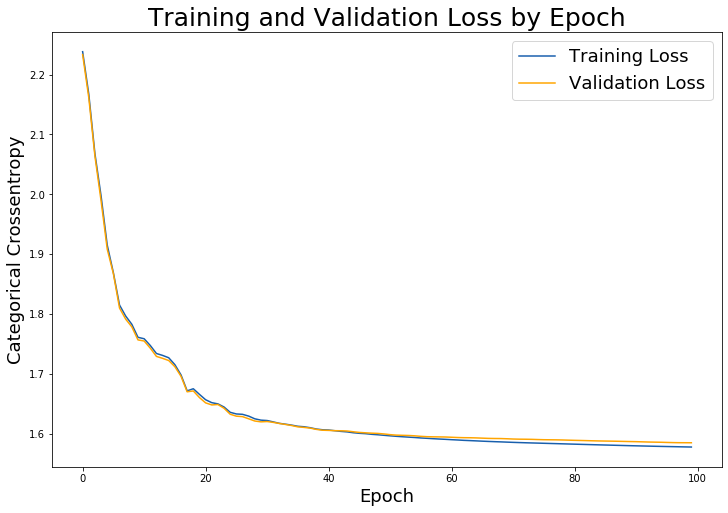

In [64]:
# Check out our train loss and test loss over epochs.
# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_losses, label='Training Loss', color='#185fad')
plt.plot(val_losses, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [23]:
preds = pred.argmax(axis=1)
preds_2 = pd.DataFrame(preds, columns=['Label'])
preds_2.columns = ['Label']
preds_2.index.name = 'ImageID'
preds_2.index += 1
preds_2.to_csv('./predictions/tf_nn.csv')

In [41]:
# Building option 2 -- Keras "Sequential" Network

model_2 = Sequential()

model_2.add(Dense(
    128, 
    input_dim=784,
    activation='relu'
))
model_2.add(Dropout(0.25))
model_2.add(Dense(
    64, 
    activation='relu'
))
model_2.add(Dropout(0.25))
model_2.add(Dense(
    32, 
    activation='relu'
))
model_2.add(Dropout(0.3))
model_2.add(Dense(
    10, 
    activation='softmax'
))
model_2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history_2 = model_2.fit(X_train_flat,
                        y_train_flat,
                        batch_size=256,
                        validation_data=(X_val_flat, y_val_flat),
                        epochs=30,
                        verbose=1)

W0819 22:18:07.110076 4810700224 deprecation.py:323] From <ipython-input-41-d9c957ad6c1e>:5: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dropout instead.


Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 1s 41us/step - loss: 1.1425 - acc: 0.6195 - val_loss: 0.3501 - val_acc: 0.9050
Epoch 2/30
31500/31500 [==============================] - 1s 19us/step - loss: 0.4822 - acc: 0.8576 - val_loss: 0.2391 - val_acc: 0.9304
Epoch 3/30
31500/31500 [==============================] - 1s 19us/step - loss: 0.3519 - acc: 0.9023 - val_loss: 0.1876 - val_acc: 0.9450
Epoch 4/30
31500/31500 [==============================] - 1s 32us/step - loss: 0.2849 - acc: 0.9223 - val_loss: 0.1597 - val_acc: 0.9542
Epoch 5/30
31500/31500 [==============================] - 1s 21us/step - loss: 0.2496 - acc: 0.9337 - val_loss: 0.1413 - val_acc: 0.9602
Epoch 6/30
31500/31500 [==============================] - 1s 19us/step - loss: 0.2179 - acc: 0.9413 - val_loss: 0.1333 - val_acc: 0.9610
Epoch 7/30
31500/31500 [==============================] - 1s 19us/step - loss: 0.1987 - acc: 0.9461 - val_loss: 0.1230 - val_acc

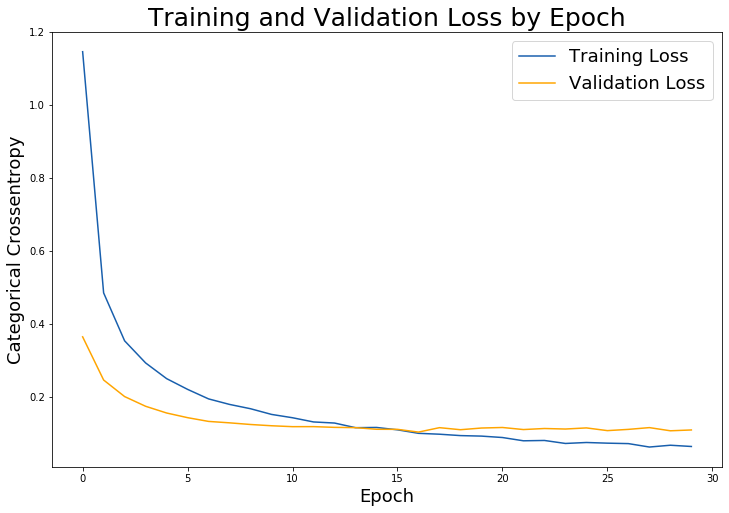

In [25]:
# Check out our train loss and test loss over epochs.
train_loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss_2, label='Training Loss', color='#185fad')
plt.plot(val_loss_2, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

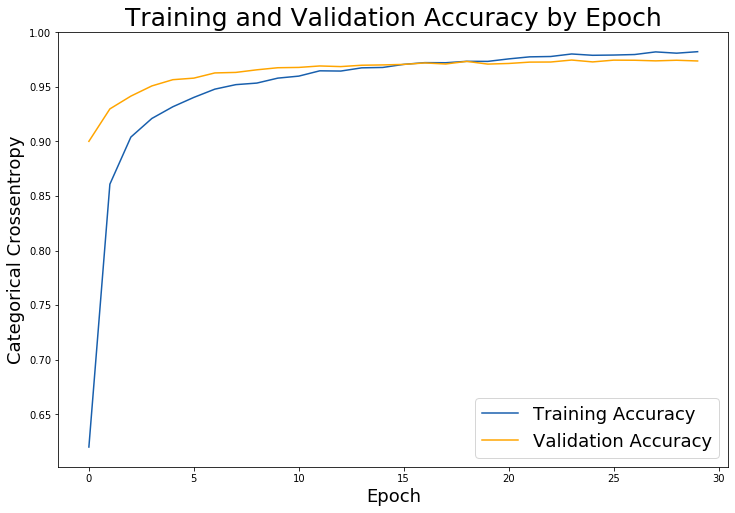

In [28]:
# Check out our train loss and test loss over epochs.
train_acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc_2, label='Training Accuracy', color='#185fad')
plt.plot(val_acc_2, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [29]:
preds = model_2.predict_classes(X_test)
preds_2 = pd.DataFrame(preds, columns=['Label'])
preds_2.columns = ['Label']
preds_2.index.name = 'ImageID'
preds_2.index += 1
preds_2.to_csv('./predictions/keras_nn.csv')

In [30]:
# reshaping to input to CNN
X_data_reshape = X_data.reshape(X_data.shape[0], 28, 28, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [33]:
# train/val split for CNN
X_train, X_val, y_train, y_val= train_test_split(
    X_data_reshape, y_data, random_state = 42)

In [34]:
# Building option 3 -- Keras CNN

model_3 = Sequential()

model_3.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    input_shape = (28, 28, 1)
))
model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu'
))
model_3.add(MaxPooling2D(pool_size=2))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/20
31500/31500 [==============================] - 13s 415us/step - loss: 1.5541 - acc: 0.4395 - val_loss: 0.4620 - val_acc: 0.8678
Epoch 2/20
31500/31500 [==============================] - 12s 374us/step - loss: 0.5233 - acc: 0.8418 - val_loss: 0.2127 - val_acc: 0.9369
Epoch 3/20
31500/31500 [==============================] - 13s 423us/step - loss: 0.3460 - acc: 0.8992 - val_loss: 0.1600 - val_acc: 0.9510
Epoch 4/20
31500/31500 [==============================] - 13s 410us/step - loss: 0.2754 - acc: 0.9223 - val_loss: 0.1296 - val_acc: 0.9609
Epoch 5/20
31500/31500 [==============================] - 14s 455us/step - loss: 0.2288 - acc: 0.9350 - val_loss: 0.1158 - val_acc: 0.9656
Epoch 6/20
31500/31500 [==============================] - 13s 427us/step - loss: 0.2046 - acc: 0.9428 - val_loss: 0.1148 - val_acc: 0.9656
Epoch 7/20
31500/31500 [==============================] - 14s 434us/step - loss: 0.1882 - acc: 0.9459 - val_loss: 0.

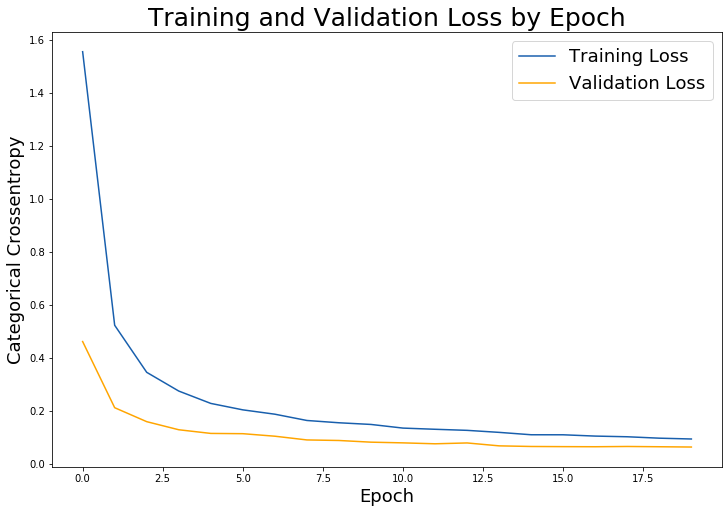

In [35]:
# Check out our train loss and test loss over epochs.
train_loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss_3, label='Training Loss', color='#185fad')
plt.plot(val_loss_3, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

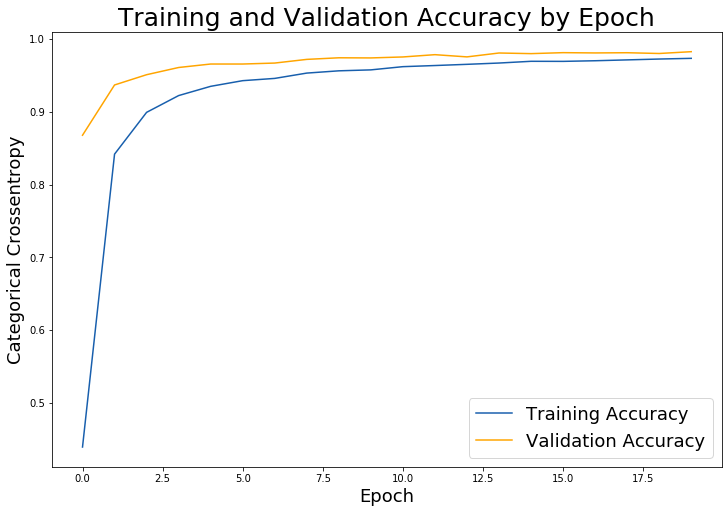

In [36]:
# Check out our train loss and test loss over epochs.
train_acc_3 = history_3.history['acc']
val_acc_3 = history_3.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc_3, label='Training Accuracy', color='#185fad')
plt.plot(val_acc_3, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [37]:
preds = model_3.predict_classes(X_test_reshape)
preds_3 = pd.DataFrame(preds, columns=['Label'])
preds_3.columns = ['Label']
preds_3.index.name = 'ImageID'
preds_3.index += 1
preds_3.to_csv('./predictions/keras_cnn.csv')

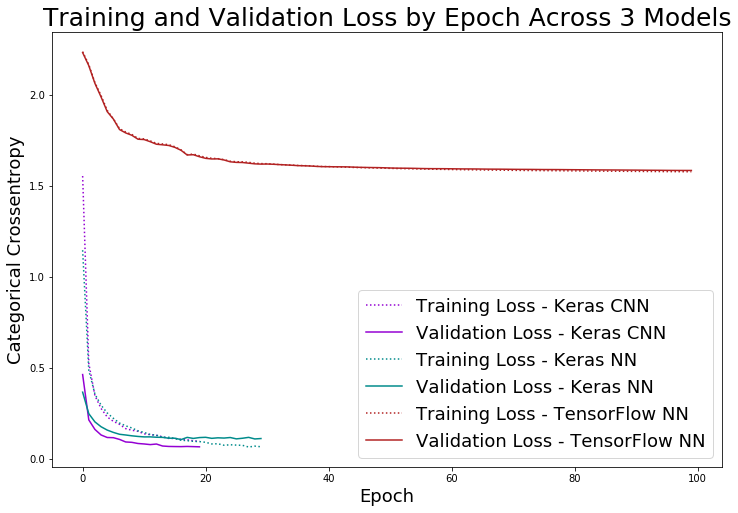

In [65]:
# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss_3, label='Training Loss - Keras CNN', color='darkviolet', ls=':')
plt.plot(val_loss_3, label='Validation Loss - Keras CNN', color='darkviolet')
plt.plot(train_loss_2, label='Training Loss - Keras NN', color='darkcyan', ls=':')
plt.plot(val_loss_2, label='Validation Loss - Keras NN', color='darkcyan')
plt.plot(train_losses, label='Training Loss - TensorFlow NN', color='firebrick', ls=':')
plt.plot(val_losses, label='Validation Loss - TensorFlow NN', color='firebrick')

# Set title
plt.title('Training and Validation Loss by Epoch Across 3 Models', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);